# Objective:-
    • To develop a model or Emissions (CO, NOx) and estimate the important contributing factors 
    • Development of the what-if tool box to create the scenarios of the input parameters and see the corresponding values of CO, NOx) 
    • Dashboard using python for time-series trending of the parameters

#### Attributes UOM & Meaning:-
     1. Ambient temperature(AT) in ◦C
     2. Ambient pressure(AP) in mbar
     3. Ambient humidity (AH) (%)
     4. Air filter difference pressure(AFDP) in mbar
     5. Gas turbine exhaust pressure (GTEP) in mbar
     6. Turbine inlet temperature(TIT) in ◦C
     7. Turbine after temperature(TAT) in ◦C
     8. Compressor discharge pressure(CDP) in mbar
     9. Turbine energy yield(TEY) in MWH
     10. Carbon monoxide(CO) in mg/m3
     11. Nitrogen oxides(NOx) in mg/m3

##  Predicting CO and NOx emissions

### Importing Required liberaries

In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,explained_variance_score

import statsmodels.api as sm
from scipy import stats

from sklearn.neural_network import MLPRegressor

import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('gt_2013.csv')
data

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0     9.3779  1020.1  90.262  2.3927  19.166  1043.6  541.16  110.16  10.564   
1     9.2985  1019.9  89.934  2.3732  19.119  1039.9  538.94  109.23  10.572   
2     9.1337  1019.8  89.868  2.3854  19.178  1041.0  539.47  109.62  10.543   
3     8.9715  1019.3  89.490  2.3825  19.180  1037.1  536.89  108.88  10.458   
4     9.0157  1019.1  89.099  2.4044  19.206  1043.5  541.25  110.09  10.464   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
7147  4.8631  1027.0  81.084  4.2825  34.045  1100.0  529.98  168.38  14.290   
7148  4.5173  1027.4  80.813  4.2481  33.904  1100.1  530.47  168.07  14.344   
7149  4.2717  1027.9  80.380  4.2817  34.165  1099.9  529.56  168.55  14.395   
7150  4.0853  1028.6  78.907  4.2313  33.802  1100.1  530.61  167.98  14.343   
7151  4.2148  1029.4  70.679  4.2049  33.768  1100.0  530.97  167.30  14.291   

           CO      NOX  
0      9.3472   98.741  
1     11.0160  104.290  
2     10.7500  103.470  
3     12.2870  108.810  
4      9.8229  100.020  
...       ...      ...  
7147   1.2538   78.397  
7148   1.0808   78.251  
7149   1.0472   77.269  
7150   1.0875   77.985  
7151   1.1337   78.950  

[7152 rows x 11 columns]

In [3]:
data.shape

(7152, 11)

In [4]:
data.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [5]:
data.describe()

AT           AP           AH         AFDP         GTEP  \
count  7152.00000  7152.000000  7152.000000  7152.000000  7152.000000   
mean     17.60262  1011.999607    80.461624     3.695958    25.105097   
std       6.86289     6.290065    14.125390     0.805829     4.350711   
min       0.28985   989.380000    27.504000     2.329500    18.104000   
25%      12.04875  1008.400000    71.493500     3.100350    21.385000   
50%      17.20450  1011.800000    84.002000     3.627850    24.852500   
75%      23.16400  1016.000000    91.579000     4.156825    26.385750   
max      33.87300  1029.700000   100.190000     6.977900    36.950000   

               TIT          TAT          TEY          CDP           CO  \
count  7152.000000  7152.000000  7152.000000  7152.000000  7152.000000   
mean   1081.569463   545.780885   132.168342    11.971586     2.723031   
std      17.385147     7.358935    16.348156     1.132159     2.363913   
min    1022.100000   518.320000   101.480000     9.875400     0.005033   
25%    1065.975000   543.745000   118.005000    11.001250     1.257975   
50%    1087.300000   549.900000   133.570000    11.956000     1.782700   
75%    1094.400000   550.030000   135.520000    12.319250     3.591225   
max    1100.500000   550.530000   172.960000    14.867000    35.045000   

               NOX  
count  7152.000000  
mean     70.007899  
std      12.048249  
min      43.198000  
25%      62.269000  
50%      68.651000  
75%      76.001500  
max     119.910000

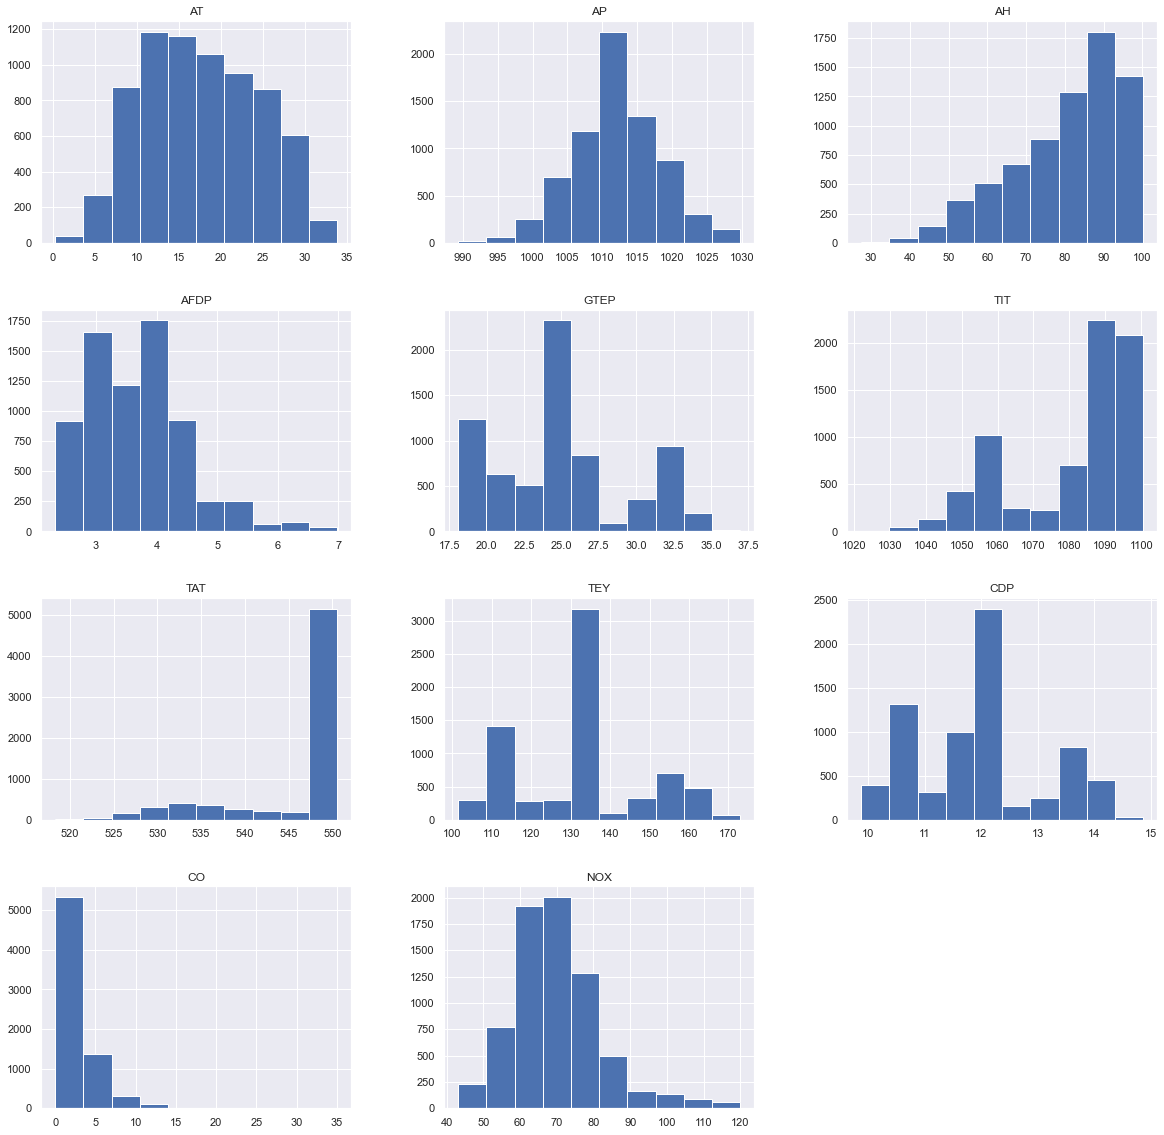

In [6]:
data.hist(figsize = (20,20)) ;

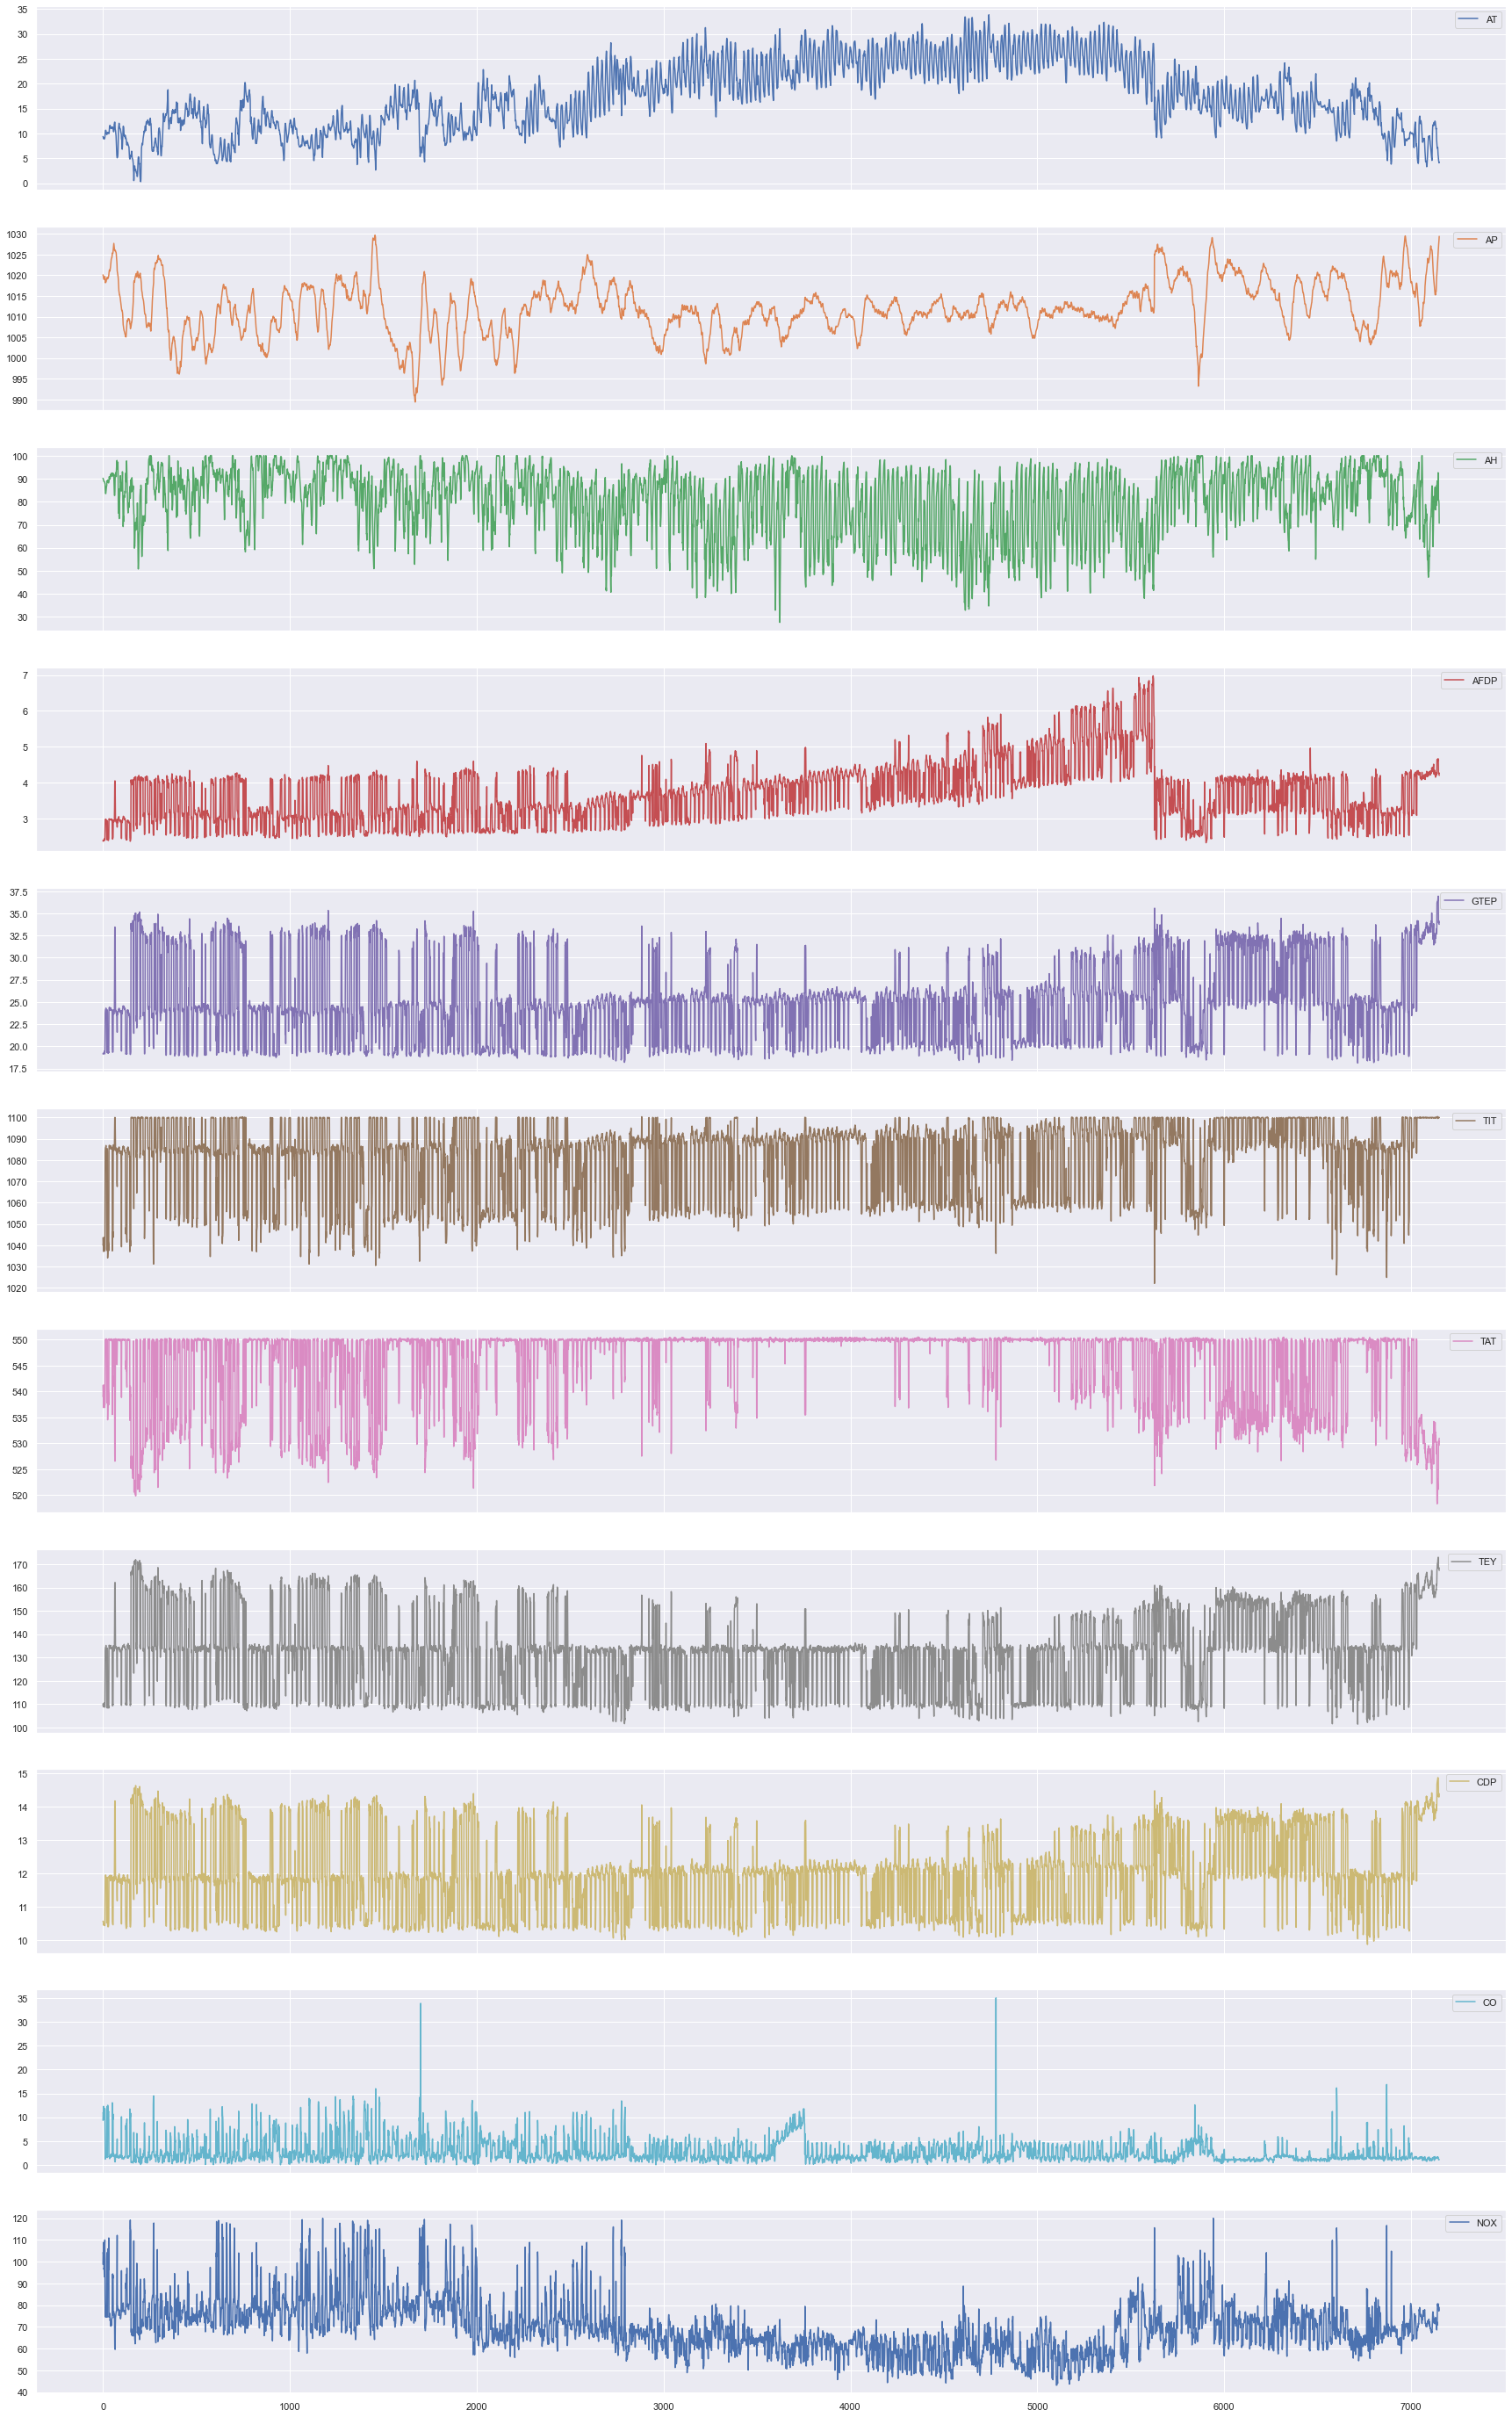

In [7]:
data.plot(subplots=True, figsize=(30,50)) ;

In [8]:
data_correlation = data.corr()

In [9]:
data_correlation

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
AT    1.000000 -0.224382 -0.598627  0.583369 -0.043098  0.112788  0.332060   
AP   -0.224382  1.000000 -0.019056  0.022045  0.207948  0.163417 -0.236419   
AH   -0.598627 -0.019056  1.000000 -0.477844 -0.188930 -0.251603  0.005067   
AFDP  0.583369  0.022045 -0.477844  1.000000  0.624854  0.644273 -0.326829   
GTEP -0.043098  0.207948 -0.188930  0.624854  1.000000  0.896211 -0.770147   
TIT   0.112788  0.163417 -0.251603  0.644273  0.896211  1.000000 -0.415352   
TAT   0.332060 -0.236419  0.005067 -0.326829 -0.770147 -0.415352  1.000000   
TEY  -0.165419  0.226761 -0.115436  0.540439  0.981677  0.917162 -0.722024   
CDP  -0.069336  0.229323 -0.181624  0.612137  0.996149  0.912384 -0.748264   
CO   -0.157783 -0.109782  0.247851 -0.479581 -0.642176 -0.806942  0.155655   
NOX  -0.581687  0.096800  0.182527 -0.386677 -0.024444 -0.122998 -0.179357   

           TEY       CDP        CO       NOX  
AT   -0.165419 -0.069336 -0.157783 -0.581687  
AP    0.226761  0.229323 -0.109782  0.096800  
AH   -0.115436 -0.181624  0.247851  0.182527  
AFDP  0.540439  0.612137 -0.479581 -0.386677  
GTEP  0.981677  0.996149 -0.642176 -0.024444  
TIT   0.917162  0.912384 -0.806942 -0.122998  
TAT  -0.722024 -0.748264  0.155655 -0.179357  
TEY   1.000000  0.990425 -0.668985  0.040766  
CDP   0.990425  1.000000 -0.655751 -0.005352  
CO   -0.668985 -0.655751  1.000000  0.366217  
NOX   0.040766 -0.005352  0.366217  1.000000

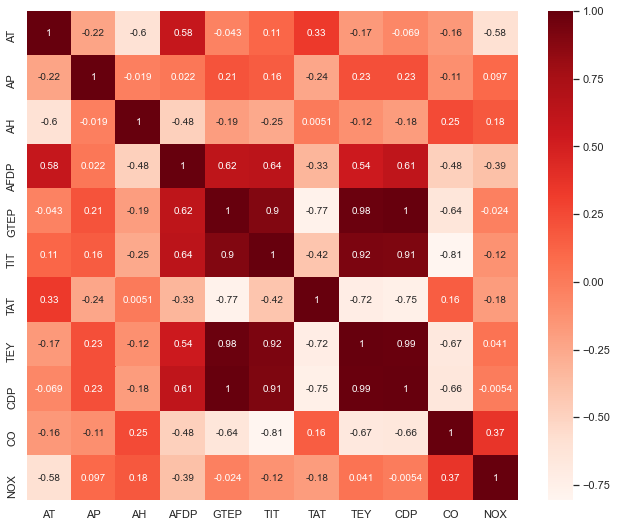

In [10]:
plt.figure(figsize=(11,9))
sns.heatmap(data_correlation, annot=True, cmap=plt.cm.Reds)
plt.show()

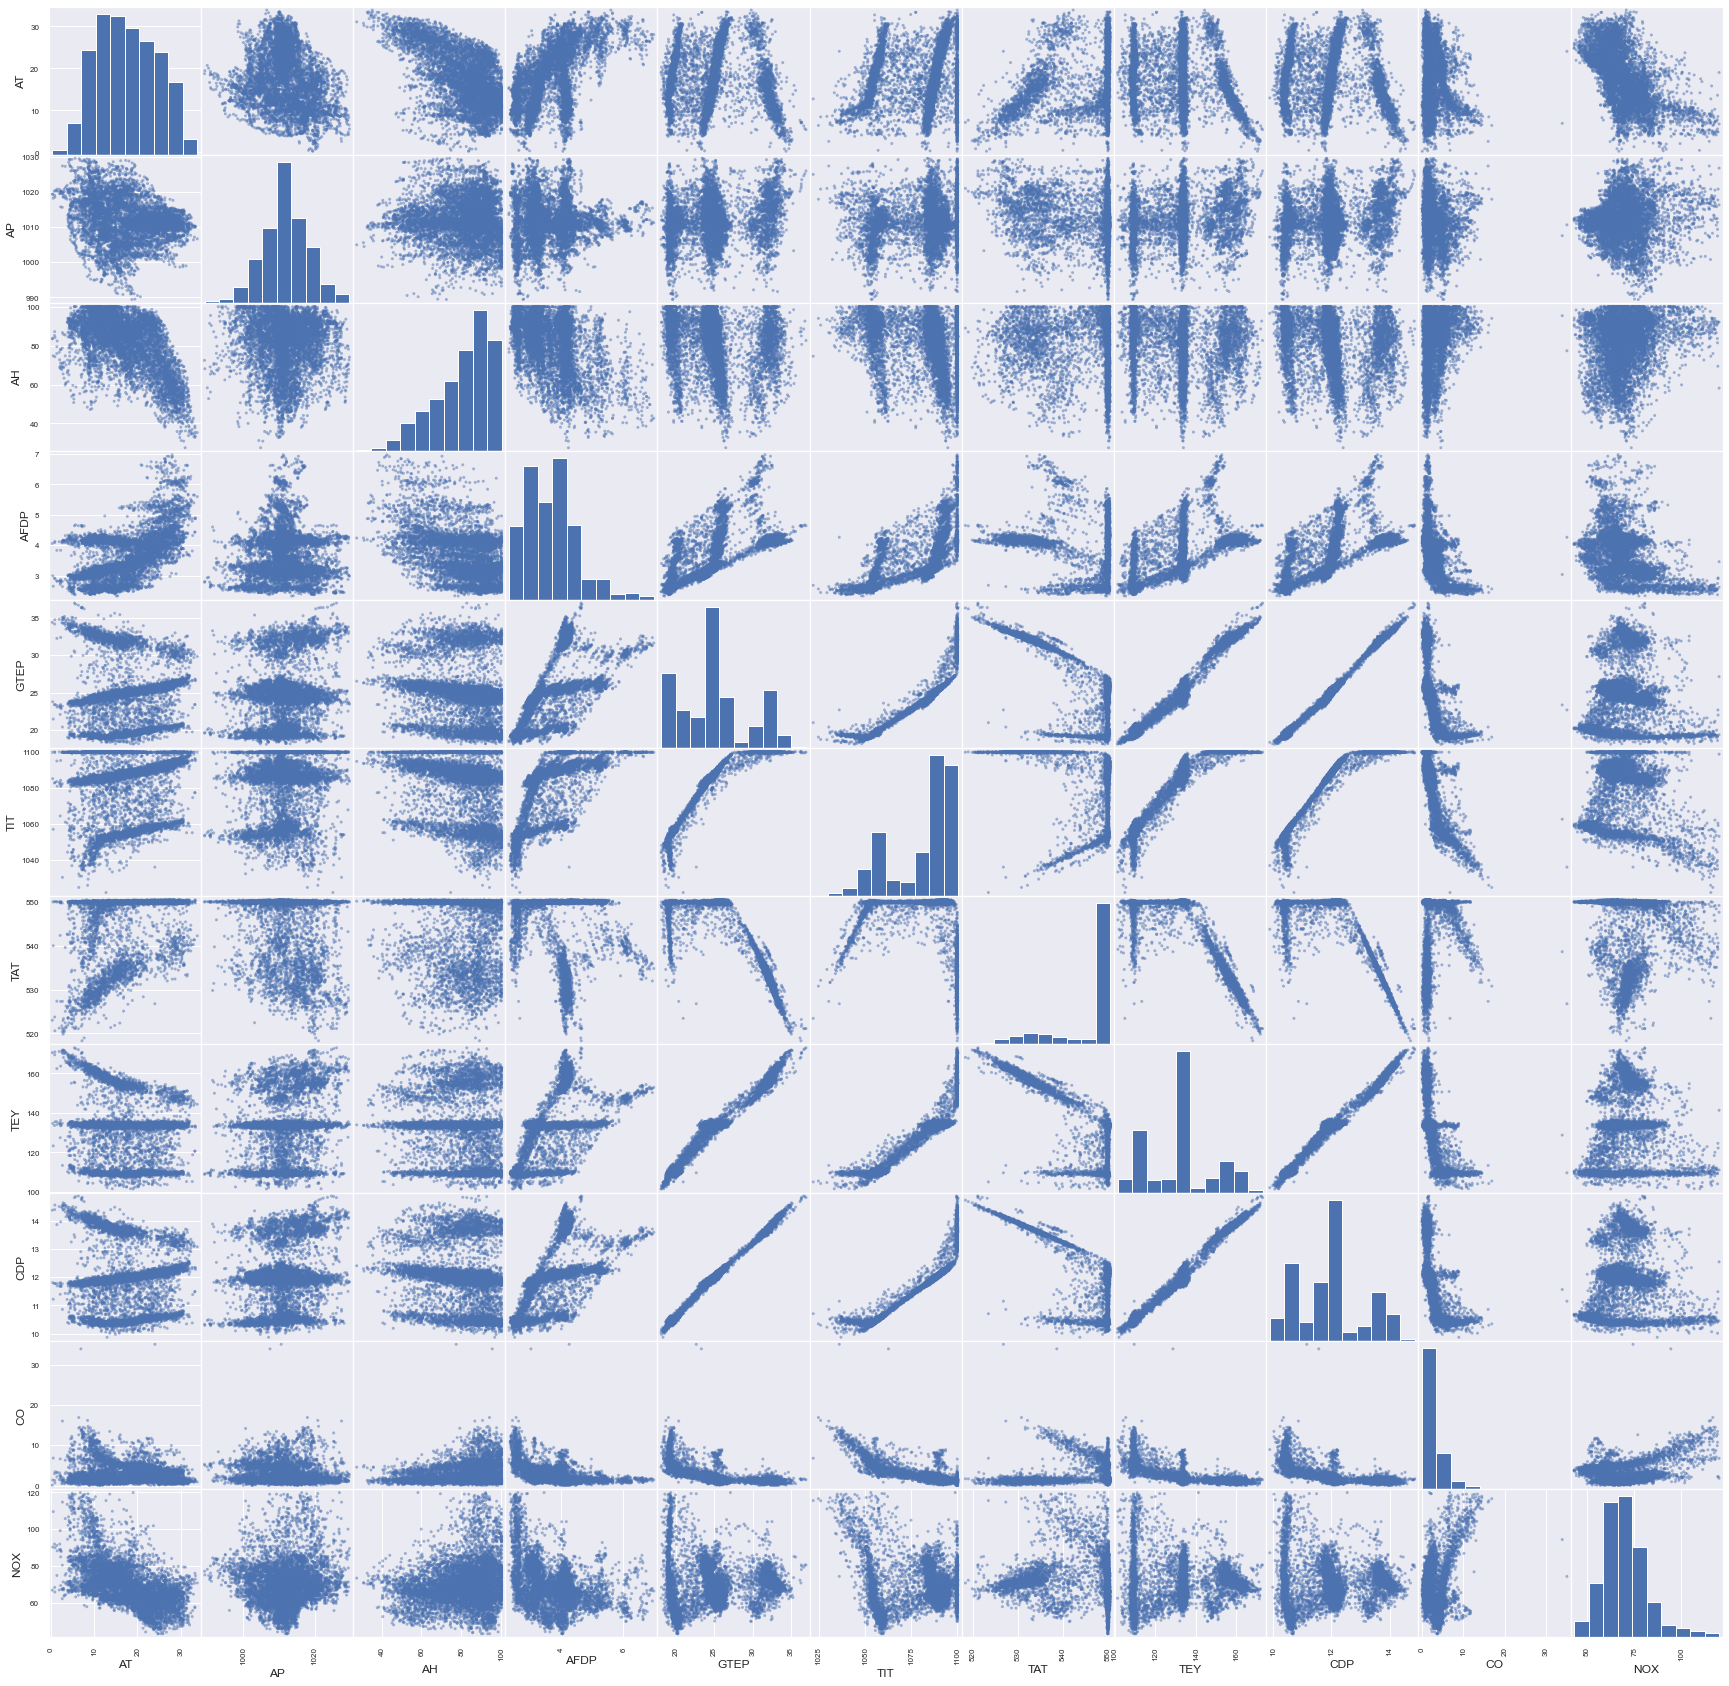

In [11]:
pd.plotting.scatter_matrix(data, figsize=(30,30) ) ;

In [12]:
# Machine Learning Models for regression
def linear_reg(X_train, X_test, y_train, y_test):
    '''
    Linear Regression Model
    '''
    lin_model = LinearRegression(normalize=True) #
    lin_model.fit(X_train, y_train)
    # model evaluation for training set
    y_train_predict = lin_model.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
    r2 = r2_score(y_train, y_train_predict)

    print("The Linear Regression model performance for training set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("\n")

    # model evaluation for testing set
    y_test_predict = lin_model.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
    r2 = r2_score(y_test, y_test_predict)

    print("The Linear Regression model performance for testing set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    
    return(lin_model, y_test_predict, rmse, r2)


def RandomF_reg(X_train, X_test, y_train, y_test):
    '''
    Random Forest Regression Model
    '''
    rf_reg = RandomForestRegressor()
    rf_reg.fit(X_train,y_train)

    # model evaluation for training set
    y_train_predict = rf_reg.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
    r2 = r2_score(y_train, y_train_predict)

    print("The RF model performance for training set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("\n")

    # model evaluation for testing set
    y_test_predict = rf_reg.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
    r2 = r2_score(y_test, y_test_predict)

    print("The RF model performance for testing set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    
    return(rf_reg, y_test_predict, rmse, r2)


def GBoost_reg(X_train, X_test, y_train, y_test):
    '''
    Random Forest Regression Model
    '''
    gb_reg = GradientBoostingRegressor()
    gb_reg.fit(X_train,y_train)

    # model evaluation for training set
    y_train_predict = gb_reg.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
    r2 = r2_score(y_train, y_train_predict)

    print("The GB model performance for training set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("\n")

    # model evaluation for testing set
    y_test_predict = gb_reg.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
    r2 = r2_score(y_test, y_test_predict)

    print("The GB model performance for testing set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    
    return(gb_reg, y_test_predict, rmse, r2)


def XGboost_reg(X_train, X_test, y_train, y_test):
    '''
    XG Boost Regression Model
    '''
    xg_reg = XGBRegressor()
    xg_reg.fit(X_train,y_train)

    # model evaluation for training set
    y_train_predict = xg_reg.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
    r2 = r2_score(y_train, y_train_predict)

    print("The XG Boost model performance for training set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("\n")

    # model evaluation for testing set
    y_test_predict = xg_reg.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
    r2 = r2_score(y_test, y_test_predict)

    print("The XG Boost model performance for testing set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    
    return(xg_reg, y_test_predict, rmse, r2)


def polynom_reg(X_train, X_test, y_train, y_test):
    '''
    Polynomial Regression Model
    '''
    poly_reg = PolynomialFeatures(degree=2)
    X_poly = poly_reg.fit_transform(X_train)
    pol_reg = LinearRegression(normalize=True)
    pol_reg.fit(X_poly, y_train)

    # model evaluation for training set
    y_train_predict = pol_reg.predict(poly_reg.fit_transform(X_train))
    rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
    r2 = r2_score(y_train, y_train_predict)

    print("The Polynomial Regression model performance for training set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("\n")

    # model evaluation for testing set
    y_test_predict = pol_reg.predict(poly_reg.fit_transform(X_test))
    rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
    r2 = r2_score(y_test, y_test_predict)

    print("The Polynomial Regression model performance for testing set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    
    return(pol_reg, y_test_predict, rmse, r2)


def MLP_reg(X_train, X_test, y_train, y_test):
    '''
    Random Forest Regression Model
    '''
    NN_reg = MLPRegressor(solver='adam',alpha=0.001,learning_rate='invscaling',n_iter_no_change=100,max_iter=500)
    NN_reg.fit(X_train,y_train)

    # model evaluation for training set
    y_train_predict = NN_reg.predict(X_train)
    rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
    r2 = r2_score(y_train, y_train_predict)

    print("The Neural Netowork model performance for training set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    print("\n")

    # model evaluation for testing set
    y_test_predict = NN_reg.predict(X_test)
    rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
    r2 = r2_score(y_test, y_test_predict)

    print("The Neural Netowork model performance for testing set")
    print("--------------------------------------")
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))
    
    return(NN_reg, y_test_predict, rmse, r2)

### Dependent and Independent data split

In [13]:
y_co = data['CO']
y_nox = data['NOX']
x = data.drop(['CO','NOX'], axis = 1)

### A) CO (Carbon Monoxide) predictions

In [14]:
X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(x, y_co, test_size=0.2, random_state=30)

#### 1. Using Linear regression to Predict CO

In [15]:
lin_reg_co, y_test_pred_lin_co, rmse_lin_co, r2_lin_co = linear_reg(X_train_co, X_test_co, y_train_co, y_test_co)

The Linear Regression model performance for training set
--------------------------------------
RMSE is 1.296238296524657
R2 score is 0.7007222335560055


The Linear Regression model performance for testing set
--------------------------------------
RMSE is 1.1857108690978782
R2 score is 0.7433722586573781


<AxesSubplot:>

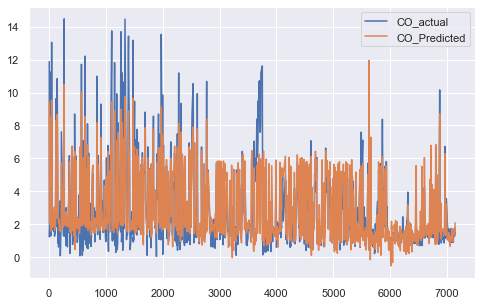

In [16]:
yy = pd.DataFrame(y_test_co)
y1 = pd.DataFrame(y_test_pred_lin_co)
y1.index = yy.index
bb = pd.concat([yy,y1], axis=1)
bb.columns = ['CO_actual','CO_Predicted']
bb.sort_index().plot(figsize = (8,5))

In [17]:
X2 = sm.add_constant(X_train_co).astype(float)
est = sm.OLS(y_train_co, X2 )
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                     CO   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     1486.
Date:                Sat, 17 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:23:24   Log-Likelihood:                -9602.2
No. Observations:                5721   AIC:                         1.922e+04
Df Residuals:                    5711   BIC:                         1.929e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        191.4572      6.008     31.869      0.0

In [18]:
### Checking the Coefficients and PValues
coefs = pd.DataFrame(est2.params)
pval = pd.DataFrame(est2.pvalues)
coe_pval = pd.concat([coefs,pval], axis=1)
coe_pval.columns = ['Regression Coefficient','P Value']
coe_pval.sort_values(by='P Value',ascending=True ,axis=0)

Regression Coefficient        P Value
const              191.457235  2.845293e-205
GTEP                -1.318452   2.229227e-65
TAT                 -0.313876   8.478721e-33
AH                   0.017965   2.927415e-26
CDP                  2.660204   1.579449e-15
AT                   0.059247   4.954312e-08
AP                  -0.015973   5.502724e-07
TEY                 -0.030212   2.100332e-01
AFDP                -0.008347   8.589712e-01
TIT                  0.001418   9.397986e-01

In [19]:
zz = coe_pval.sort_values(by='P Value',ascending=True ,axis=0)
zz

Regression Coefficient        P Value
const              191.457235  2.845293e-205
GTEP                -1.318452   2.229227e-65
TAT                 -0.313876   8.478721e-33
AH                   0.017965   2.927415e-26
CDP                  2.660204   1.579449e-15
AT                   0.059247   4.954312e-08
AP                  -0.015973   5.502724e-07
TEY                 -0.030212   2.100332e-01
AFDP                -0.008347   8.589712e-01
TIT                  0.001418   9.397986e-01

#### 2. Using Random Forest Regression to predict CO

In [20]:
rf_reg_co, y_test_pred_rf_co, rmse_rf_co, r2_rf_co = RandomF_reg(X_train_co, X_test_co, y_train_co, y_test_co)

The RF model performance for training set
--------------------------------------
RMSE is 0.35057114428174296
R2 score is 0.9781094290055949


The RF model performance for testing set
--------------------------------------
RMSE is 0.8616330543817781
R2 score is 0.8644839600664631


<AxesSubplot:>

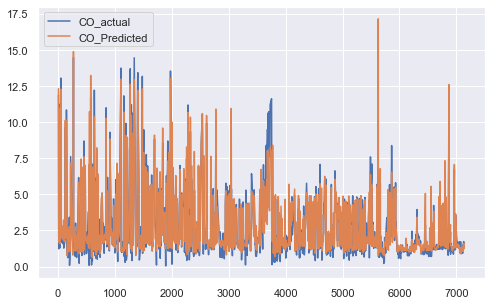

In [21]:
yy = pd.DataFrame(y_test_co)
y1 = pd.DataFrame(y_test_pred_rf_co)
y1.index = yy.index
bb = pd.concat([yy,y1], axis=1)
bb.columns = ['CO_actual','CO_Predicted']
# bb.to_csv('rf_result.csv')
bb.sort_index().plot(figsize = (8,5))

Text(0, 0.5, 'Predicted CO')

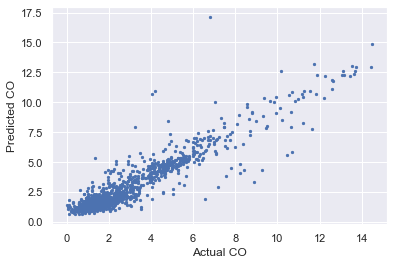

In [22]:
plt.scatter(y_test_co, y_test_pred_rf_co, s=5)
plt.xlabel("Actual CO")
plt.ylabel("Predicted CO")

In [23]:
feat_imp = rf_reg_co.feature_importances_
ft_df = pd.DataFrame(feat_imp)
ft_df.index = list(X_train_co.columns)
ft_df.columns = ['imp']
ft_df.sort_values(by='imp',ascending=False ,axis=0)

imp
TIT   0.621205
TAT   0.156305
AFDP  0.058625
GTEP  0.039015
AH    0.033916
AP    0.030638
AT    0.026293
CDP   0.018192
TEY   0.015810

#### 3. Using XG boost to Predict CO

In [24]:
xg_reg_co, y_test_pred_xg_co, rmse_xg_co, r2_xg_co = XGboost_reg(X_train_co, X_test_co, y_train_co, y_test_co)

The XG Boost model performance for training set
--------------------------------------
RMSE is 0.33747592026415696
R2 score is 0.9797142841400936


The XG Boost model performance for testing set
--------------------------------------
RMSE is 0.8685303436520107
R2 score is 0.8623056908177296


#### 4. Using Graident boost to Predict CO

In [25]:
gb_reg_co, y_test_pred_gb_co, rmse_gb_co, r2_gb_co = GBoost_reg(X_train_co, X_test_co, y_train_co, y_test_co)

The GB model performance for training set
--------------------------------------
RMSE is 0.8664305118356556
R2 score is 0.8662874309448523


The GB model performance for testing set
--------------------------------------
RMSE is 0.9511644317611007
R2 score is 0.8348581280584535


#### 5. Using Polynomial Regression to Predict CO

In [26]:
poly_reg_co, y_test_pred_poly_co, rmse_poly_co, r2_poly_co = polynom_reg(X_train_co, X_test_co, y_train_co, y_test_co)

The Polynomial Regression model performance for training set
--------------------------------------
RMSE is 1.0639958985473297
R2 score is 0.7983562965611037


The Polynomial Regression model performance for testing set
--------------------------------------
RMSE is 1.0690575418531558
R2 score is 0.7913837362522557


#### 6. Using Neural Network Regression to Predict CO

In [27]:
NN_reg_co, y_test_pred_NN_co, rmse_NN_co, r2_NN_co = MLP_reg(X_train_co, X_test_co, y_train_co, y_test_co)

The Neural Netowork model performance for training set
--------------------------------------
RMSE is 1.3859036570096666
R2 score is 0.6578860061292382


The Neural Netowork model performance for testing set
--------------------------------------
RMSE is 1.2250919156487101
R2 score is 0.726042403316618


### B) NOx (Nitrogen Oxides) Prediction

In [29]:
X_train_nox, X_test_nox, y_train_nox, y_test_nox = train_test_split(x, y_nox, test_size=0.2, random_state=40)

#### 1. Using Linear regression to Predict NOx

In [30]:
lin_reg_nox, y_test_pred_lin_nox, rmse_lin_nox, r2_lin_nox = linear_reg(X_train_nox, X_test_nox, y_train_nox, y_test_nox)

The Linear Regression model performance for training set
--------------------------------------
RMSE is 9.100423760434984
R2 score is 0.43164379514338835


The Linear Regression model performance for testing set
--------------------------------------
RMSE is 9.230925534321916
R2 score is 0.40314211371885955


In [31]:
X2 = sm.add_constant(X_train_nox).astype(float)
est = sm.OLS(y_train_nox, X2 )
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                    NOX   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     481.9
Date:                Sat, 17 Sep 2022   Prob (F-statistic):               0.00
Time:                        19:25:39   Log-Likelihood:                -20752.
No. Observations:                5721   AIC:                         4.152e+04
Df Residuals:                    5711   BIC:                         4.159e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -153.8041     42.208     -3.644      0.0

In [32]:
### Checking the Coefficients and PValues
coefs = pd.DataFrame(est2.params)
pval = pd.DataFrame(est2.pvalues)
coe_pval = pd.concat([coefs,pval], axis=1)
coe_pval.columns = ['Regression Coefficient','P Value']
coe_pval.sort_values(by='P Value',ascending=True ,axis=0)

Regression Coefficient        P Value
AT                  -2.211357  3.404009e-176
AH                  -0.267818  2.052627e-109
TEY                 -2.673797   2.364688e-55
AP                  -0.270317   3.461656e-33
CDP                 26.854460   6.468031e-30
TIT                  0.726226   4.920712e-08
const             -153.804140   2.708216e-04
AFDP                -0.654287   4.445241e-02
TAT                 -0.337647   6.879812e-02
GTEP                -0.356361   5.083967e-01

In [33]:
zz = coe_pval.sort_values(by='P Value',ascending=True ,axis=0)
zz

Regression Coefficient        P Value
AT                  -2.211357  3.404009e-176
AH                  -0.267818  2.052627e-109
TEY                 -2.673797   2.364688e-55
AP                  -0.270317   3.461656e-33
CDP                 26.854460   6.468031e-30
TIT                  0.726226   4.920712e-08
const             -153.804140   2.708216e-04
AFDP                -0.654287   4.445241e-02
TAT                 -0.337647   6.879812e-02
GTEP                -0.356361   5.083967e-01

#### 2. Using Random Forest Regression to predict NOx

In [34]:
rf_reg_nox, y_test_pred_rf_nox, rmse_rf_nox, r2_rf_nox = RandomF_reg(X_train_nox, X_test_nox, y_train_nox, y_test_nox)

The RF model performance for training set
--------------------------------------
RMSE is 1.707061665946728
R2 score is 0.9800015749822627


The RF model performance for testing set
--------------------------------------
RMSE is 4.48359426637085
R2 score is 0.8591901448513344


<AxesSubplot:>

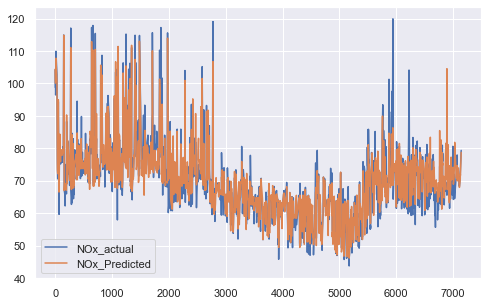

In [35]:
yy = pd.DataFrame(y_test_nox)
y1 = pd.DataFrame(y_test_pred_rf_nox)
y1.index = yy.index
bb = pd.concat([yy,y1], axis=1)
bb.columns = ['NOx_actual','NOx_Predicted']
# bb.to_csv('rf_result.csv')
bb.sort_index().plot(figsize = (8,5))

Text(0, 0.5, 'Predicted NOx')

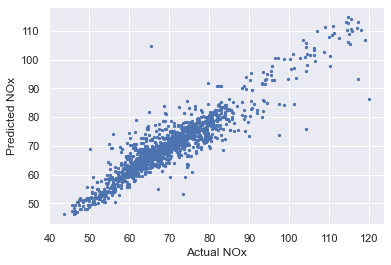

In [36]:
plt.scatter(y_test_nox, y_test_pred_rf_nox, s=5)
plt.xlabel("Actual NOx")
plt.ylabel("Predicted NOx")

In [37]:
feat_imp = rf_reg_nox.feature_importances_
ft_df = pd.DataFrame(feat_imp)
ft_df.index = list(X_train_nox.columns)
ft_df.columns = ['imp']
ft_df.sort_values(by='imp',ascending=False ,axis=0)

imp
AT    0.380172
TIT   0.217708
TEY   0.081951
AP    0.071838
TAT   0.068192
AFDP  0.063510
AH    0.049602
GTEP  0.047209
CDP   0.019817

#### 3. Using XG boost to Predict NOx

In [38]:
xg_reg_nox, y_test_pred_xg_nox, rmse_xg_nox, r2_xg_nox = XGboost_reg(X_train_nox, X_test_nox, y_train_nox, y_test_nox)

The XG Boost model performance for training set
--------------------------------------
RMSE is 1.896938900895542
R2 score is 0.9753052826408282


The XG Boost model performance for testing set
--------------------------------------
RMSE is 4.552909888061975
R2 score is 0.854802696501646


#### 4. Using Graident boost to Predict NOx

In [39]:
gb_reg_nox, y_test_pred_gb_nox, rmse_gb_nox, r2_gb_nox = GBoost_reg(X_train_nox, X_test_nox, y_train_nox, y_test_nox)

The GB model performance for training set
--------------------------------------
RMSE is 5.06373083643263
R2 score is 0.8240300139862928


The GB model performance for testing set
--------------------------------------
RMSE is 5.531384119000355
R2 score is 0.7856872157692154


#### 5. Using Polynomial Regression to Predict NOx

In [40]:
poly_reg_nox, y_test_pred_poly_nox, rmse_poly_nox, r2_poly_nox = polynom_reg(X_train_nox, X_test_nox, y_train_nox, y_test_nox)

The Polynomial Regression model performance for training set
--------------------------------------
RMSE is 5.5189900186240655
R2 score is 0.7909661634631937


The Polynomial Regression model performance for testing set
--------------------------------------
RMSE is 5.583318306284597
R2 score is 0.781643956218838


#### 6. Using Neural Network Regression to Predict NOx

In [41]:
NN_reg_nox, y_test_pred_NN_nox, rmse_NN_nox, r2_NN_nox = MLP_reg(X_train_nox, X_test_nox, y_train_nox, y_test_nox)

The Neural Netowork model performance for training set
--------------------------------------
RMSE is 7.135683367473927
R2 score is 0.6505632995643938


The Neural Netowork model performance for testing set
--------------------------------------
RMSE is 7.165677951025243
R2 score is 0.6403376208355482


C:\Users\mangesh.kshirsagar.TSPL\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
